#### Read in tweet data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import RegexpTokenizer, WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
from string import punctuation
import collections
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import spacy
import en_core_web_sm

data = pd.read_csv("t_1612626504.0854883_allFullTweets copy.txt", sep=",", encoding='cp1252', header=None)
cols_to_drop=[1,2,3]
data.drop(data.columns[cols_to_drop], axis=1,inplace=True)
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
data.rename(columns={0: "User", 4: "Tweet"}, inplace=True)
#data

### Cleaning/Processing Tweet Data

In [2]:
def clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r'(@[A-Za-z0–9]+)|(\w+:\/\/\S+)|^rt|http.+?', "",   elem)) 
    return df


In [3]:
data = clean_text(data, 'Tweet')
data

,User,Tweet
0,naaaaattteee,no cap
1,naaaaattteee,eeevvvvverrrrr
2,naaaaattteee,if you in the south just retweet respectfully
3,naaaaattteee,i don’t ever want to hear it’s just a hat it’s just a flag or it’s just a slogan it’s just blatant racism and it always has…
4,naaaaattteee,watch this
...,...,...
25723,704Tre_,happy black history month to this tweet
25724,704Tre_,best thing i ever did was calm down i be cool on a lot of shit
25725,704Tre_,i will be successful that is not an affirmation it’s a spoiler alert
25726,704Tre_,one in a million 1996


In [4]:
#Removes stopwords, tokenizes and lemmatizes (reduces word to root form)
def tweet_refining(text):
    final_text = []
    for i in w_tokenizer.tokenize(text):
       if i.lower() not in stop:
           word = lemmatizer.lemmatize(i)
           final_text.append(word.lower())
    return " ".join(final_text)

In [5]:
nlp = en_core_web_sm.load() 
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation) 
stop.update(punctuation)
w_tokenizer = WhitespaceTokenizer()
data.Tweet = data.Tweet.apply(tweet_refining)
data

,User,Tweet
0,naaaaattteee,cap
1,naaaaattteee,eeevvvvverrrrr
2,naaaaattteee,south retweet respectfully
3,naaaaattteee,don’t ever want hear it’s hat it’s flag it’s slogan it’s blatant racism always has…
4,naaaaattteee,watch
...,...,...
25723,704Tre_,happy black history month tweet
25724,704Tre_,best thing ever calm cool lot shit
25725,704Tre_,successful affirmation it’s spoiler alert
25726,704Tre_,one million 1996


### Reading in wordlists

In [6]:
with open('CategoryDining.txt', 'r') as file:
    dining_words = file.read().replace('\n', ' ')
dining = tweet_refining(dining_words)


with open('CategoryEducation.txt', 'r') as file:
    education_words = file.read().replace('\n', ' ')
education = tweet_refining(education_words)


with open('CategoryHealth.txt', 'r') as file:
    health_words = file.read().replace('\n', ' ')
health = tweet_refining(health_words)


with open('CategorySport.txt', 'r') as file:
    sport_words = file.read().replace('\n', ' ')
sport = tweet_refining(sport_words)


with open('CategoryPolitics.txt', 'r') as file:
    politics_words = file.read().replace('\n', ' ')
politics = tweet_refining(politics_words)






In [7]:
#Create sets for classifying
str1=dining
words=str1.split()
dining=" ".join(sorted(set(words), key=words.index))
dining

str1=education
words=str1.split()
education=" ".join(sorted(set(words), key=words.index))


str1=health
words=str1.split()
health=" ".join(sorted(set(words), key=words.index))


str1=sport
words=str1.split()
sport=" ".join(sorted(set(words), key=words.index))

str1=politics
words=str1.split()
politics=" ".join(sorted(set(words), key=words.index))
health

'allergy appointment cancer dentist diet doctor drug eating fitness gym health hostpital medical pharmacy pilate pound running weight work workout yoga anemia anorexia addiction bacteria virus bone conditioning cure vaccine disability disease disorder healthy headache hormone hygiene immunity infection influenza insulin lifestyle lumbar medication memory mental metabolic muscular obesity nutrition overweight pregnancy pregnant prevention psychology physiotherapy rehab rehabilitation respiration safety sanitation sanitary senile skin sleep squat stamen strength symptom strong stress tremor trauma treatment transplant vaccination walking'

### Jaccard Scoring

In [8]:
###
#Jaccard Similarity: Jaccard similarity or intersection over union is defined as size of 
#intersection divided by size of union of two sets.
#Jaccard similarity takes only unique set of words for each sentence or document while cosine similarity takes 
#total length of the vectors. Jaccard similarity is good for cases where duplication does not matter, 
#cosine similarity is good for cases where duplication matters. In our case, context matters more 
#than duplication thus Jaccard similarity is the ideal technique to use.
###
def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)
def get_scores(group,tweets):
    scores = []
    for tweet in tweets:
        s = jaccard_similarity(group, tweet)
        scores.append(s)
    return scores
d_scores = get_scores(dining, data.Tweet.to_list())
e_scores = get_scores(education, data.Tweet.to_list())
h_scores = get_scores(health, data.Tweet.to_list())
s_scores = get_scores(sport, data.Tweet.to_list())
p_scores = get_scores(politics, data.Tweet.to_list())
p_scores


[0.11538461538461539,
 0.11538461538461539,
 0.5384615384615384,
 0.7142857142857143,
 0.19230769230769232,
 0.7692307692307693,
 0.7037037037037037,
 0.23076923076923078,
 0.2692307692307692,
 0.48148148148148145,
 0.2692307692307692,
 0.6923076923076923,
 0.5483870967741935,
 0.0,
 0.6923076923076923,
 0.5,
 0.7241379310344828,
 0.23076923076923078,
 0.7692307692307693,
 0.5,
 0.7407407407407407,
 0.3333333333333333,
 0.5384615384615384,
 0.37037037037037035,
 0.6153846153846154,
 0.19230769230769232,
 0.15384615384615385,
 0.6666666666666666,
 0.5,
 0.8148148148148148,
 0.7777777777777778,
 0.6923076923076923,
 0.6666666666666666,
 0.6551724137931034,
 0.34615384615384615,
 0.34615384615384615,
 0.8518518518518519,
 0.8076923076923077,
 0.8076923076923077,
 0.7777777777777778,
 0.37037037037037035,
 0.2222222222222222,
 0.6923076923076923,
 0.6923076923076923,
 0.48148148148148145,
 0.7857142857142857,
 0.6875,
 0.6153846153846154,
 0.2222222222222222,
 0.2222222222222222,
 0.692307

In [9]:
# create a jaccard scored df.
cols  = {'names':data.User.to_list(), 'dining_score':d_scores,
         'education_score': e_scores, 'health_score':h_scores, 'sport_score':s_scores, 
         'politics_score':p_scores}
scores_df = pd.DataFrame(cols)
scores_df


,names,dining_score,education_score,health_score,sport_score,politics_score
0,naaaaattteee,0.111111,0.115385,0.115385,0.096774,0.115385
1,naaaaattteee,0.111111,0.074074,0.115385,0.096774,0.115385
2,naaaaattteee,0.518519,0.481481,0.538462,0.451613,0.538462
3,naaaaattteee,0.689655,0.600000,0.714286,0.606061,0.714286
4,naaaaattteee,0.185185,0.148148,0.192308,0.161290,0.192308
...,...,...,...,...,...,...
25723,704Tre_,0.666667,0.629630,0.692308,0.580645,0.692308
25724,704Tre_,0.592593,0.555556,0.615385,0.516129,0.615385
25725,704Tre_,0.535714,0.555556,0.555556,0.468750,0.555556
25726,704Tre_,0.233333,0.241379,0.241379,0.281250,0.241379


In [10]:
#assign classes based on highest score
def get_classes(l1, l2, l3, l4, l5):
    dine = []
    edu = []
    heal = []
    spo = []
    pol = []
    for i, j, k, l, n in zip(l1, l2, l3, l4, l5):
        m = max(i, j, k, l, n)
        if m == i:
            dine.append(1)
        else:
            dine.append(0)
        if m == j:
            edu.append(1)
        else:
            edu.append(0)        
        if m == k:
            heal.append(1)
        else:
            heal.append(0)  
        if m == l:
            spo.append(1)
        else:
            spo.append(0)   
        if m == l:
            pol.append(1)
        else:
            pol.append(0)   
            
    return dine, edu, heal, spo, pol

In [11]:
l1 = scores_df.dining_score.to_list()
l2 = scores_df.education_score.to_list()
l3 = scores_df.health_score.to_list()
l4 = scores_df.sport_score.to_list()
l5 = scores_df.politics_score.to_list()

dine, edu, heal, spo, pol = get_classes(l1, l2, l3, l4, l5)

cols = {'name': scores_df.names.to_list(), 'dining':dine, 'education':edu, 'health': heal, 'sport':spo, 'politics':pol}

#DF with all tweets classified
class_df = pd.DataFrame(cols)
class_df

,name,dining,education,health,sport,politics
0,naaaaattteee,0,1,1,0,0
1,naaaaattteee,0,0,1,0,0
2,naaaaattteee,0,0,1,0,0
3,naaaaattteee,0,0,1,0,0
4,naaaaattteee,0,0,1,0,0
...,...,...,...,...,...,...
25723,704Tre_,0,0,1,0,0
25724,704Tre_,0,0,1,0,0
25725,704Tre_,0,1,1,0,0
25726,704Tre_,0,0,0,1,1


In [12]:
#grouping the tweets by username
new_groups_df = class_df.groupby(['name']).sum()

#add a new totals column
new_groups_df['total'] = new_groups_df['dining'] + new_groups_df['education'] + new_groups_df['health'] 
+  new_groups_df['sport'] +  new_groups_df['politics']

#add a new totals row
new_groups_df.loc["Total"] = new_groups_df.sum()  

### Tweet Classification Pie Chart

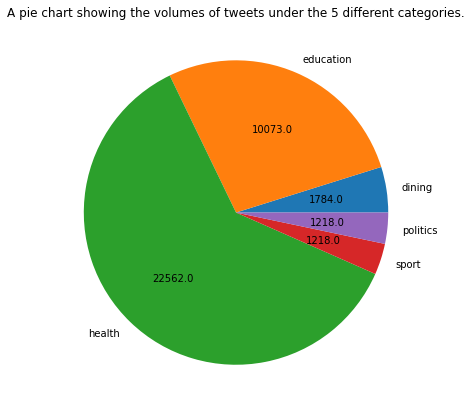

In [13]:
import matplotlib.pyplot as plt
import numpy as np
def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 0)
    return a

fig = plt.figure(figsize =(10, 7)) 
a = new_groups_df.drop(['total'], axis = 1)
sizes=a.loc['Total']
plt.pie(sizes, labels = a.columns, autopct=absolute_value)
plt.title('A pie chart showing the volumes of tweets under the 5 different categories.')
plt.show()

### Clustering 

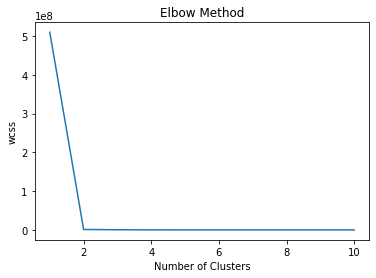

In [14]:
###
#TODO: Make more exhaustive wordlists, clustering currently doesn't work well
###

X = new_groups_df[['health', 'politics']].values
# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()


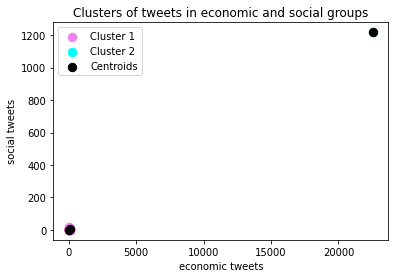

In [15]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)
# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=70, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=70, c='cyan', label= 'Cluster 2')
#plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=70, c='green', label= 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=70, c='black', label='Centroids' )
plt.title('Clusters of tweets in economic and social groups')
plt.xlabel('economic tweets')
plt.ylabel('social tweets')
plt.legend()
plt.show()

In [16]:
new_groups_df

,dining,education,health,sport,politics,total
name,,,,,,
0hnaij_,0,37,65,0,0,102
15DreamTeam,0,1,0,0,0,1
1DreElder,0,2,4,0,0,6
1PINUPDOLL,0,24,46,0,0,70
1demecio,2,7,14,0,0,23
...,...,...,...,...,...,...
yungbre_,0,42,96,2,2,138
zdoubleE,0,3,9,0,0,12
zoe_boogie,1,5,11,1,1,17
